## Задание 1 Создание файла     
Файл должен содержать 200 записей с такими 14 признаками:

- "Улица" (укажите для генерации 5-6 улиц), 
- "Дом",
- "Расстояние до центра (км)",
- "Площадь (кв. м)",
- "Количество комнат",
- "Метраж жилой площади (кв. м)",
- "Этаж",
- "Наличие лифта" (есть, нет),
- "Санузел" (раздельный, совместный),
- "Кухня студия" (да, нет),
- "Цена в месяц (тыс. тг)",
- "Дата аренды",
- "Имя владельца",
- "Контактный номер"

In [5]:
import numpy as np
import pandas as pd

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import csv

flats = pd.read_csv("krishadata.csv")

In [12]:
flats.head()

,id,uuid,url,room,square,city,lat,lon,description,photo,star,focus,id.1,date,flat_id,price
0,22190390,741a0b95-9fd2-445c-b9d9-80716d93258b,https://krisha.kz/a/show/22190390,3,100.0,Астана,51.161347,71.417215,"жил. комплекс Esil Apartments, монолитный дом,...",https://krisha-photos.kcdn.online/webp/74/741a...,0,0,421,2024-10-10,22190390,400000
1,26230374,a04d9601-f6e7-46e2-b8cf-83c7903b3e09,https://krisha.kz/a/show/26230374,2,85.0,Астана,51.110323,71.431119,"жил. комплекс Янтарный, кирпичный дом, 2016 г....",https://krisha-photos.kcdn.online/webp/a0/a04d...,0,0,222,2024-10-10,26230374,380000
2,26988684,a7e02d30-6aea-4fdf-8ec3-f6cab20caea9,https://krisha.kz/a/show/26988684,2,62.0,Астана,51.162178,71.435199,"жил. комплекс Айя, кирпичный дом, 2006 г.п., ж...",https://krisha-photos.kcdn.online/webp/a7/a7e0...,0,0,80,2024-10-10,26988684,250000
3,27652365,2038a730-c28c-4931-8834-8bff0298a345,https://krisha.kz/a/show/27652365,4,134.0,Астана,51.161342,71.417179,"жил. комплекс Esil Apartments, монолитный дом,...",https://krisha-photos.kcdn.online/webp/20/2038...,0,0,420,2024-10-10,27652365,500000
4,30417159,98668b76-6091-4742-90bc-08960b319443,https://krisha.kz/a/show/30417159,1,43.0,Астана,51.130801,71.387912,"жил. комплекс GreenLine.Зеленый квартал, монол...",https://krisha-photos.kcdn.online/webp/98/9866...,0,0,765,2024-10-10,30417159,300000


In [13]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           819 non-null    int64  
 1   uuid         819 non-null    object 
 2   url          819 non-null    object 
 3   room         819 non-null    int64  
 4   square       819 non-null    float64
 5   city         819 non-null    object 
 6   lat          819 non-null    float64
 7   lon          819 non-null    float64
 8   description  819 non-null    object 
 9   photo        819 non-null    object 
 10  star         819 non-null    int64  
 11  focus        819 non-null    int64  
 12  id.1         819 non-null    int64  
 13  date         819 non-null    object 
 14  flat_id      819 non-null    int64  
 15  price        819 non-null    int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 102.5+ KB


Поля `id, uuid, url, photo, id.1, flat_id` не несут какой-то дополнительной информации для последующего анализа данных, поэтому от них можно избавиться.

In [43]:
flats.drop(['id', 'uuid', 'url', 'photo', 'id.1', 'flat_id'], axis=1, inplace=True)
flats.head()

KeyError: "['id', 'uuid', 'url', 'photo', 'id.1', 'flat_id'] not found in axis"

Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland
<class 'str'>


In [40]:
from geopy.geocoders import Nominatim
from geopy.point import Point

geolocator = Nominatim(user_agent="geoapiExercises")
def get_address(row):
    coord = f"{row['lat']}, {row['lon']}"
    return geolocator.reverse(coord)

flats['address'] = flats.apply(get_address, axis=1)

print(flats)

     room  square    city        lat        lon  \
0       3   100.0  Астана  51.161347  71.417215   
1       2    85.0  Астана  51.110323  71.431119   
2       2    62.0  Астана  51.162178  71.435199   
3       4   134.0  Астана  51.161342  71.417179   
4       1    43.0  Астана  51.130801  71.387912   
..    ...     ...     ...        ...        ...   
814     1    40.0  Астана  51.101417  71.398708   
815     3    60.0  Астана  51.158687  71.435011   
816     2    47.0  Астана  51.200142  71.391496   
817     1    45.0  Астана  44.800568  66.128438   
818     2    42.0  Астана  51.096966  71.390382   

                                           description  star  focus  \
0    жил. комплекс Esil Apartments, монолитный дом,...     0      0   
1    жил. комплекс Янтарный, кирпичный дом, 2016 г....     0      0   
2    жил. комплекс Айя, кирпичный дом, 2006 г.п., ж...     0      0   
3    жил. комплекс Esil Apartments, монолитный дом,...     0      0   
4    жил. комплекс GreenLine.Зел

In [42]:
flats.head(20)

,room,square,city,lat,lon,description,star,focus,date,price,address
0,3,100.0,Астана,51.161347,71.417215,"жил. комплекс Esil Apartments, монолитный дом,...",0,0,2024-10-10,400000,"(3, улица Желтоксан, Сарыарқа ауданы, Астана, ..."
1,2,85.0,Астана,51.110323,71.431119,"жил. комплекс Янтарный, кирпичный дом, 2016 г....",0,0,2024-10-10,380000,"(23, Мәңгілік Ел даңғылы, Заречный, Есіл аудан..."
2,2,62.0,Астана,51.162178,71.435199,"жил. комплекс Айя, кирпичный дом, 2006 г.п., ж...",0,0,2024-10-10,250000,"(7А, улица Иманбаевой, Байқоңыр ауданы, Астана..."
3,4,134.0,Астана,51.161342,71.417179,"жил. комплекс Esil Apartments, монолитный дом,...",0,0,2024-10-10,500000,"(3, улица Желтоксан, Сарыарқа ауданы, Астана, ..."
4,1,43.0,Астана,51.130801,71.387912,"жил. комплекс GreenLine.Зеленый квартал, монол...",0,0,2024-10-10,300000,"(17р, Сығанақ көшесі, Есіл ауданы, Астана, Нұр..."
5,3,100.0,Астана,51.137606,71.415293,"жил. комплекс Триумфальный, кирпичный дом, 201...",0,0,2024-10-10,650000,"(ЖК “Триумфальный”, 13, Қабанбай Батыр даңғылы..."
6,3,90.0,Астана,51.133249,71.461448,"жил. комплекс Ак Шанырак, монолитный дом, 2017...",0,0,2024-10-10,300000,"(2/4Б, Бауыржан Момышұлы даңғылы, Алматы аудан..."
7,1,35.0,Астана,51.101764,71.468689,"жил. комплекс Времена года. Осень, кирпичный д...",0,0,2024-10-10,200000,"(ЖК ""Саранда"", Есіл ауданы, Астана, 010000, Қа..."
8,4,134.0,Астана,51.161357,71.417282,"жил. комплекс Esil Apartments, монолитный дом,...",0,0,2024-10-10,500000,"(3, улица Желтоксан, Сарыарқа ауданы, Астана, ..."
9,2,46.0,Астана,51.117799,71.413525,"монолитный дом, 2020 г.п., жил. площадь 38 м²,...",0,0,2024-10-10,210000,"(2, улица Алматы, Есіл ауданы, Астана, 010000,..."


In [63]:
import re

def extract_living_area(description):
    match = re.search(r'жил\. площадь (\d+\.?\d*) м²', description)
    if match:
        return float(match.group(1))  
    return None

def sanuzel_type(description):
    if re.search(r'санузел раздельный|санузел 2 с/у', description, re.IGNORECASE):
        return "раздельный"
    if re.search(r'санузел совмещенный|санузел совместный', description, re.IGNORECASE):
        return "совместный"
    return None

def extract_street(address):
    match = re.search(r'(улица [\w\s]+|[\w\s]+ көшесі|[\w\s]+ даңғылы|проспект [\w\s]+)', str(address))
    if match:
        return match.group(0)
    return None

def extract_house_number(address):
    match = re.search(r'(\d+\w*/?\w*)', address)
    if match:
        return match.group(0)  # Return the matched house number
    return None

In [64]:
flats['жил. площадь'] = flats['description'].apply(extract_living_area)
flats['санузел'] = flats['description'].apply(sanuzel_type)
flats['улица'] = flats['address'].apply(extract_street)
flats['Дом'] = flats['address'].apply(extract_house_number)

Центр Астаны - Байтерек. Его координаты: 51.12825001 71.4304722322
![alt text](baiterek.jpg)

In [66]:
from geopy.distance import geodesic

center = (51.12825001, 71.4304722322)

flats['Расстояние до центра'] = flats.apply(
    lambda row: geodesic(center, (row['lat'], row['lon'])).kilometers,
    axis=1
)

In [68]:
flats.head(30)

,room,square,city,lat,lon,description,star,focus,date,price,address,жил. площадь,санузел,улица,Расстояние до центра
0,3,100.0,Астана,51.161347,71.417215,"жил. комплекс Esil Apartments, монолитный дом,...",0,0,2024-10-10,400000,"(3, улица Желтоксан, Сарыарқа ауданы, Астана, ...",53.0,раздельный,улица Желтоксан,3.797151
1,2,85.0,Астана,51.110323,71.431119,"жил. комплекс Янтарный, кирпичный дом, 2016 г....",0,0,2024-10-10,380000,"(23, Мәңгілік Ел даңғылы, Заречный, Есіл аудан...",NaN,совместный,Мәңгілік Ел даңғылы,1.994958
2,2,62.0,Астана,51.162178,71.435199,"жил. комплекс Айя, кирпичный дом, 2006 г.п., ж...",0,0,2024-10-10,250000,"(7А, улица Иманбаевой, Байқоңыр ауданы, Астана...",52.0,совместный,улица Иманбаевой,3.788990
3,4,134.0,Астана,51.161342,71.417179,"жил. комплекс Esil Apartments, монолитный дом,...",0,0,2024-10-10,500000,"(3, улица Желтоксан, Сарыарқа ауданы, Астана, ...",NaN,раздельный,улица Желтоксан,3.797228
4,1,43.0,Астана,51.130801,71.387912,"жил. комплекс GreenLine.Зеленый квартал, монол...",0,0,2024-10-10,300000,"(17р, Сығанақ көшесі, Есіл ауданы, Астана, Нұр...",NaN,совместный,Сығанақ көшесі,2.992790
5,3,100.0,Астана,51.137606,71.415293,"жил. комплекс Триумфальный, кирпичный дом, 201...",0,0,2024-10-10,650000,"(ЖК “Триумфальный”, 13, Қабанбай Батыр даңғылы...",52.0,раздельный,Қабанбай Батыр даңғылы,1.487379
6,3,90.0,Астана,51.133249,71.461448,"жил. комплекс Ак Шанырак, монолитный дом, 2017...",0,0,2024-10-10,300000,"(2/4Б, Бауыржан Момышұлы даңғылы, Алматы аудан...",58.0,раздельный,Бауыржан Момышұлы даңғылы,2.238495
7,1,35.0,Астана,51.101764,71.468689,"жил. комплекс Времена года. Осень, кирпичный д...",0,0,2024-10-10,200000,"(ЖК ""Саранда"", Есіл ауданы, Астана, 010000, Қа...",20.0,совместный,None,3.980427
8,4,134.0,Астана,51.161357,71.417282,"жил. комплекс Esil Apartments, монолитный дом,...",0,0,2024-10-10,500000,"(3, улица Желтоксан, Сарыарқа ауданы, Астана, ...",NaN,раздельный,улица Желтоксан,3.797079
9,2,46.0,Астана,51.117799,71.413525,"монолитный дом, 2020 г.п., жил. площадь 38 м²,...",0,0,2024-10-10,210000,"(2, улица Алматы, Есіл ауданы, Астана, 010000,...",38.0,совместный,улица Алматы,1.661174


Удалим оставшиеся ненужные столбцы `lat, lon, description, star, focus, address, city`

In [71]:
flats.drop(['lat', 'lon', 'description', 'star', 'focus', 'address'], axis=1, inplace=True)


KeyError: "['lat', 'lon', 'description', 'star', 'focus', 'address'] not found in axis"

In [72]:
flats.drop('city', axis=1, inplace=True)

## Задача 2 Предобработка данных

In [74]:
flats.head(15)

,room,square,date,price,жил. площадь,санузел,улица,Расстояние до центра
0,3,100.0,2024-10-10,400000,53.0,раздельный,улица Желтоксан,3.797151
1,2,85.0,2024-10-10,380000,NaN,совместный,Мәңгілік Ел даңғылы,1.994958
2,2,62.0,2024-10-10,250000,52.0,совместный,улица Иманбаевой,3.788990
3,4,134.0,2024-10-10,500000,NaN,раздельный,улица Желтоксан,3.797228
4,1,43.0,2024-10-10,300000,NaN,совместный,Сығанақ көшесі,2.992790
5,3,100.0,2024-10-10,650000,52.0,раздельный,Қабанбай Батыр даңғылы,1.487379
6,3,90.0,2024-10-10,300000,58.0,раздельный,Бауыржан Момышұлы даңғылы,2.238495
7,1,35.0,2024-10-10,200000,20.0,совместный,None,3.980427
8,4,134.0,2024-10-10,500000,NaN,раздельный,улица Желтоксан,3.797079
9,2,46.0,2024-10-10,210000,38.0,совместный,улица Алматы,1.661174


In [75]:
flats.rename(columns= {
    'square': 'площадь',
    'date': 'дата',
    'Расстояние до центра': 'до центра',
    'price': 'аренда',
    'room': 'комнат'
},
inplace=True)

In [76]:
flats.head()

,комнат,площадь,дата,аренда,жил. площадь,санузел,улица,до центра
0,3,100.0,2024-10-10,400000,53.0,раздельный,улица Желтоксан,3.797151
1,2,85.0,2024-10-10,380000,NaN,совместный,Мәңгілік Ел даңғылы,1.994958
2,2,62.0,2024-10-10,250000,52.0,совместный,улица Иманбаевой,3.788990
3,4,134.0,2024-10-10,500000,NaN,раздельный,улица Желтоксан,3.797228
4,1,43.0,2024-10-10,300000,NaN,совместный,Сығанақ көшесі,2.992790


In [77]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   комнат        819 non-null    int64  
 1   площадь       819 non-null    float64
 2   дата          819 non-null    object 
 3   аренда        819 non-null    int64  
 4   жил. площадь  51 non-null     float64
 5   санузел       61 non-null     object 
 6   улица         654 non-null    object 
 7   до центра     819 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 51.3+ KB


Много пропущенных значений в жил. площадь и санузел. 

In [83]:
non_null_data = flats[flats['жил. площадь'].notnull()]
average_ratio = (non_null_data['жил. площадь'] / non_null_data['площадь']).mean()

flats['жил. площадь'] = flats.apply(
    lambda row: row['площадь'] * average_ratio if pd.isnull(row['жил. площадь']) else row['жил. площадь'], 
    axis=1
)

In [85]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   комнат        819 non-null    int64  
 1   площадь       819 non-null    float64
 2   дата          819 non-null    object 
 3   аренда        819 non-null    int64  
 4   жил. площадь  819 non-null    float64
 5   санузел       61 non-null     object 
 6   улица         654 non-null    object 
 7   до центра     819 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 51.3+ KB


In [86]:
flats['санузел'] = flats['санузел'].map({'раздельный': True, 'совместный': False})

In [89]:
flats['санузел'] = flats['санузел']
existing_values = flats['санузел'].dropna()
prob_razdelny = (existing_values == True).mean()
flats['санузел'] = flats['санузел'].apply(
    lambda x: np.random.choice([True, False], p=[prob_razdelny, 1 - prob_razdelny]) if pd.isnull(x) else x
)

flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   комнат        819 non-null    int64  
 1   площадь       819 non-null    float64
 2   дата          819 non-null    object 
 3   аренда        819 non-null    int64  
 4   жил. площадь  819 non-null    float64
 5   санузел       819 non-null    bool   
 6   улица         654 non-null    object 
 7   до центра     819 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 45.7+ KB


Удалить все записи, где нет значения для столбца "Улица"

In [90]:
flats = flats.dropna(subset=['улица'])

In [110]:
flats.head()

,комнат,площадь,дата,аренда,жил. площадь,санузел,улица,до центра,цена за м2
0,3,100.0,2024-10-10,400000,53.000000,True,улица Желтоксан,3.797151,4000.000000
1,2,85.0,2024-10-10,380000,61.714437,False,Мәңгілік Ел даңғылы,1.994958,4470.588235
2,2,62.0,2024-10-10,250000,52.000000,False,улица Иманбаевой,3.788990,4032.258065
3,4,134.0,2024-10-10,500000,97.290995,True,улица Желтоксан,3.797228,3731.343284
4,1,43.0,2024-10-10,300000,31.220245,False,Сығанақ көшесі,2.992790,6976.744186


## Задача 3 Посчитайте и добавьте в таблицу


1. Добавить признак: средняя цена одного квадратного метра квартиры.
2. Добавьте признак, например, категорию этажности (первый, последний, другой) и выведите все квартиры на 1 этаже.
3. Внести в таблицу соотношение жилой и общей площади квартиры. Например, 100/70.

In [120]:
flats["цена за м2"] = flats.apply(lambda row:  row['аренда'] / row['площадь'], axis=1)
flats.head()


,комнат,площадь,дата,аренда,жил. площадь,санузел,улица,до центра,цена за м2
0,3,100.0,2024-10-10,400000,53.000000,True,улица Желтоксан,3.797151,4000.000000
1,2,85.0,2024-10-10,380000,61.714437,False,Мәңгілік Ел даңғылы,1.994958,4470.588235
2,2,62.0,2024-10-10,250000,52.000000,False,улица Иманбаевой,3.788990,4032.258065
3,4,134.0,2024-10-10,500000,97.290995,True,улица Желтоксан,3.797228,3731.343284
4,1,43.0,2024-10-10,300000,31.220245,False,Сығанақ көшесі,2.992790,6976.744186


In [127]:
flats['жил площадь на общ'] = flats.apply(lambda row:  f"{row['жил. площадь']:.1f}/{row['площадь']}", axis=1)

In [128]:
flats

,комнат,площадь,дата,аренда,жил. площадь,санузел,улица,до центра,цена за м2,жил площадь на общ
0,3,100.0,2024-10-10,400000,53.000000,True,улица Желтоксан,3.797151,4000.000000,53.0/100.0
1,2,85.0,2024-10-10,380000,61.714437,False,Мәңгілік Ел даңғылы,1.994958,4470.588235,61.7/85.0
2,2,62.0,2024-10-10,250000,52.000000,False,улица Иманбаевой,3.788990,4032.258065,52.0/62.0
3,4,134.0,2024-10-10,500000,97.290995,True,улица Желтоксан,3.797228,3731.343284,97.3/134.0
4,1,43.0,2024-10-10,300000,31.220245,False,Сығанақ көшесі,2.992790,6976.744186,31.2/43.0
...,...,...,...,...,...,...,...,...,...,...
813,3,116.0,2024-10-10,1500000,84.222055,True,улица Наркескен,2.298472,12931.034483,84.2/116.0
814,1,40.0,2024-10-10,200000,29.042088,False,Ұлы Дала даңғылы,3.722695,5000.000000,29.0/40.0
815,3,60.0,2024-10-10,250000,43.563132,True,улица Малика Габдулина,3.401011,4166.666667,43.6/60.0
816,2,47.0,2024-10-10,200000,34.124453,True,улица Карасай Батыра,8.449999,4255.319149,34.1/47.0


## Задание 4
    1. Вычислить:
    • среднюю цену аренды всех трехкомнатных квартир;
    • среднюю цену аренды трехкомнатных квартир по каждому адресу;
    • самую дорогую аренду;
    • адрес самой дешевой аренды двухкомнатной квартиры;
    • размах выборки однокомнатных квартир с лифтом.
    2. Оценить зависимость жилой площади от общей площади с помощью графика линейной регрессии, построить boxplot и гистограмму.
    3. Построить графики зависимости стоимости аренды квартиры от 
    • количества комнат, 
    • площади; 
    • наличия лифта.
    4. Оценить насколько каждый признак влияет на стоимость аренды, используя корреляционную матрицу

In [141]:
average_rent_3_rooms = flats[flats['комнат'] == 3]['аренда'].mean()
print(f"Средняя цена аренды всех трехкомнатных квартир: {average_rent_3_rooms:.2f} тг")


Средняя цена аренды всех трехкомнатных квартир: 473655.17 тг


In [142]:
average_rent_3_rooms_by_address = flats[flats['комнат'] == 3].groupby('улица')['аренда'].mean()
print("Средняя цена аренды трехкомнатных квартир по каждому адресу:")
average_rent_3_rooms_by_address

Средняя цена аренды трехкомнатных квартир по каждому адресу:


улица
 Абылай Хан даңғылы                  3.000000e+05
 Бауыржан Момышұлы даңғылы           2.833333e+05
 Бұқар жырау көшесі                  4.100000e+05
 Керей Және Жәнібек Хандар көшесі    6.300000e+05
 Мәңгілік Ел даңғылы                 5.466667e+05
 Орынбор көшесі                      7.250000e+05
 Сығанақ көшесі                      4.702778e+05
 Түркістан көшесі                    3.300000e+05
 Тұран даңғылы                       3.950000e+05
 Тұрар Рысқұлов көшесі               8.000000e+05
 Шыңғыс Айтматов көшесі              2.700000e+05
 Қабанбай Батыр даңғылы              5.800000e+05
 Қайым Мұхамедханов көшесі           1.500000e+06
 Ұлы Дала даңғылы                    4.000000e+05
 Әйтеке би көшесі                    3.500000e+05
проспект Абая                        3.300000e+05
проспект Женис                       2.800000e+05
проспект Кошкарбаева                 5.000000e+05
проспект Рахымжана Кошкарбаева       5.157143e+05
проспект Республики                  2.65000

In [166]:
max_rent = flats['аренда'].max()
new_df = flats['аренда' == max_rent]
new_df.head(10)
print("Самая дорогая аренда:", max_rent)


KeyError: False

In [144]:
min_rent_2_rooms = flats[flats['комнат'] == 2].sort_values(by='аренда').iloc[0]['улица']
print("Адрес самой дешевой двухкомнатной квартиры:", min_rent_2_rooms)


Адрес самой дешевой двухкомнатной квартиры: улица Мухтара Ауэзова


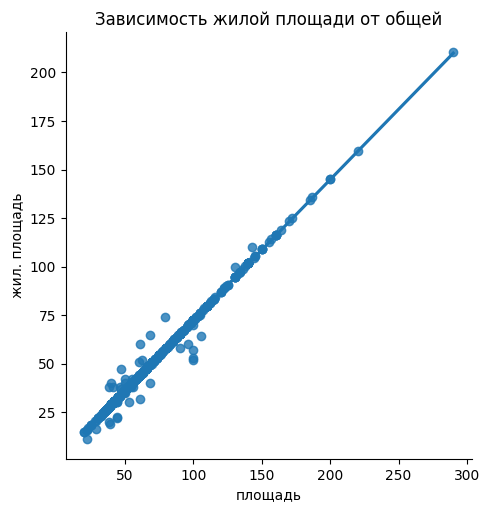

In [148]:

sns.lmplot(x='площадь', y='жил. площадь', data=flats)
plt.title('Зависимость жилой площади от общей')
plt.show()



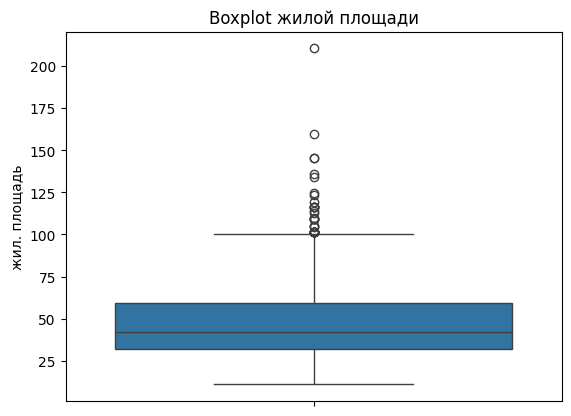

In [162]:
sns.boxplot(y='жил. площадь', data=flats)
plt.title('Boxplot жилой площади')
plt.show()


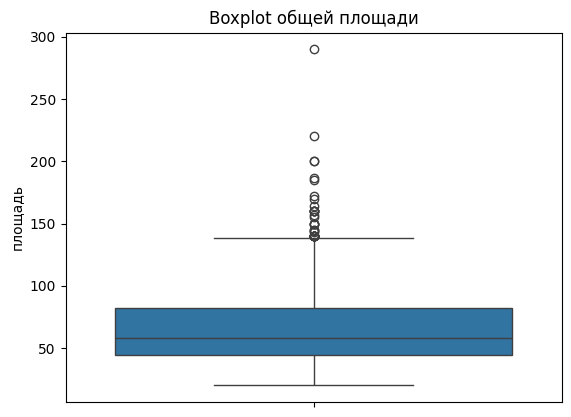

In [163]:
sns.boxplot(y='площадь', data=flats)
plt.title('Boxplot общей площади')
plt.show()

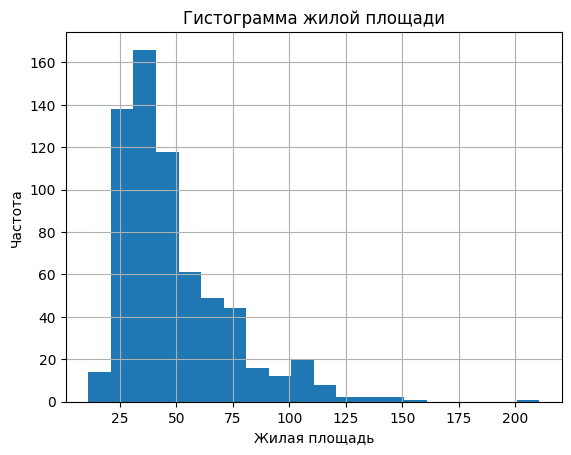

In [165]:
flats['жил. площадь'].hist(bins=20)
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.show()


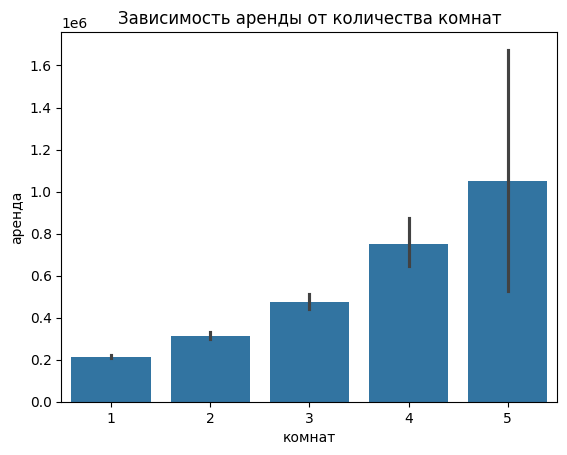

In [152]:
sns.barplot(x='комнат', y='аренда', data=flats)
plt.title('Зависимость аренды от количества комнат')
plt.show()


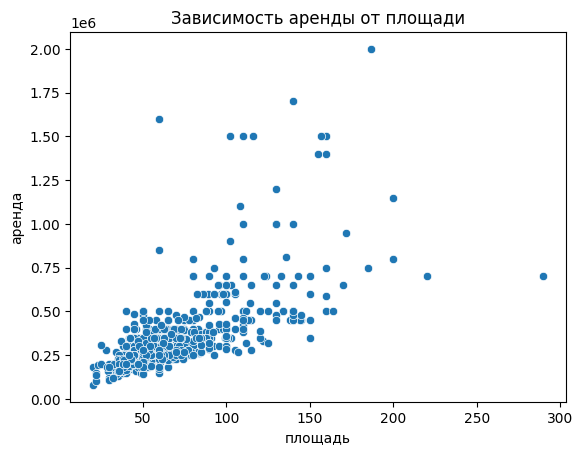

In [153]:
sns.scatterplot(x='площадь', y='аренда', data=flats)
plt.title('Зависимость аренды от площади')
plt.show()


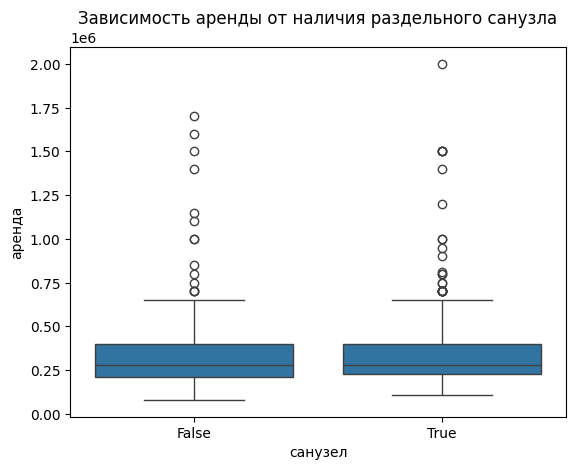

In [155]:
sns.boxplot(x='санузел', y='аренда', data=flats)
plt.title('Зависимость аренды от наличия раздельного санузла')
plt.show()


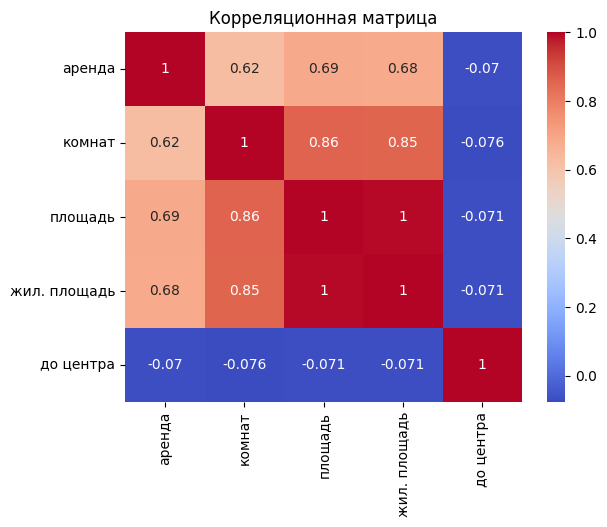

In [158]:
# Вычисление корреляционной матрицы
correlation_matrix = flats[['аренда', 'комнат', 'площадь', 'жил. площадь', 'до центра']].corr()

# Построение тепловой карты корреляций
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()
